<a href="https://colab.research.google.com/github/ArwaASM/TPE/blob/main/Train_Custom_Dataset_Prepared_By_Roboflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Checking GPU Access**

In [ ]:
!nvidia-smi

Wed Dec 11 11:43:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## **Install YOLOv8**

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 32.6/235.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir /content/datasets
%cd /content/datasets

!pip install roboflow --quiet

!pip install roboflow

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00


## **Imort Roboflow Dataset**

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="*******************")
project = rf.workspace("workspace-2-vshfa").project("moo-lffsa")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Moo-2 in yolov8:: 100%|██████████| 4158/4158 [00:00<00:00, 8780.68it/s]


## **Training Configuration**

In [ ]:
!pip install -U albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 632.7/632.7 kB 40.9 MB/s eta 0:00:00
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.19
    Uninstalling albucore-0.0.19:
      Successfully uninstalled albucore-0.0.19
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.20
    Uninstalling albumentations-1.4.20:
      Successfully uninstalled albumentations-1.4.20


In [ ]:
!pip install -U ultralytics

## **Model Training**

In [ ]:
%cd /content

!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/Moo-2/data.yaml epochs=10 imgsz=800 plots=True

/content
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 21.5M/21.5M [00:00<00:00, 94.7MB/s]
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Moo-2/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_js

## **Visulaize Training Results**

/content


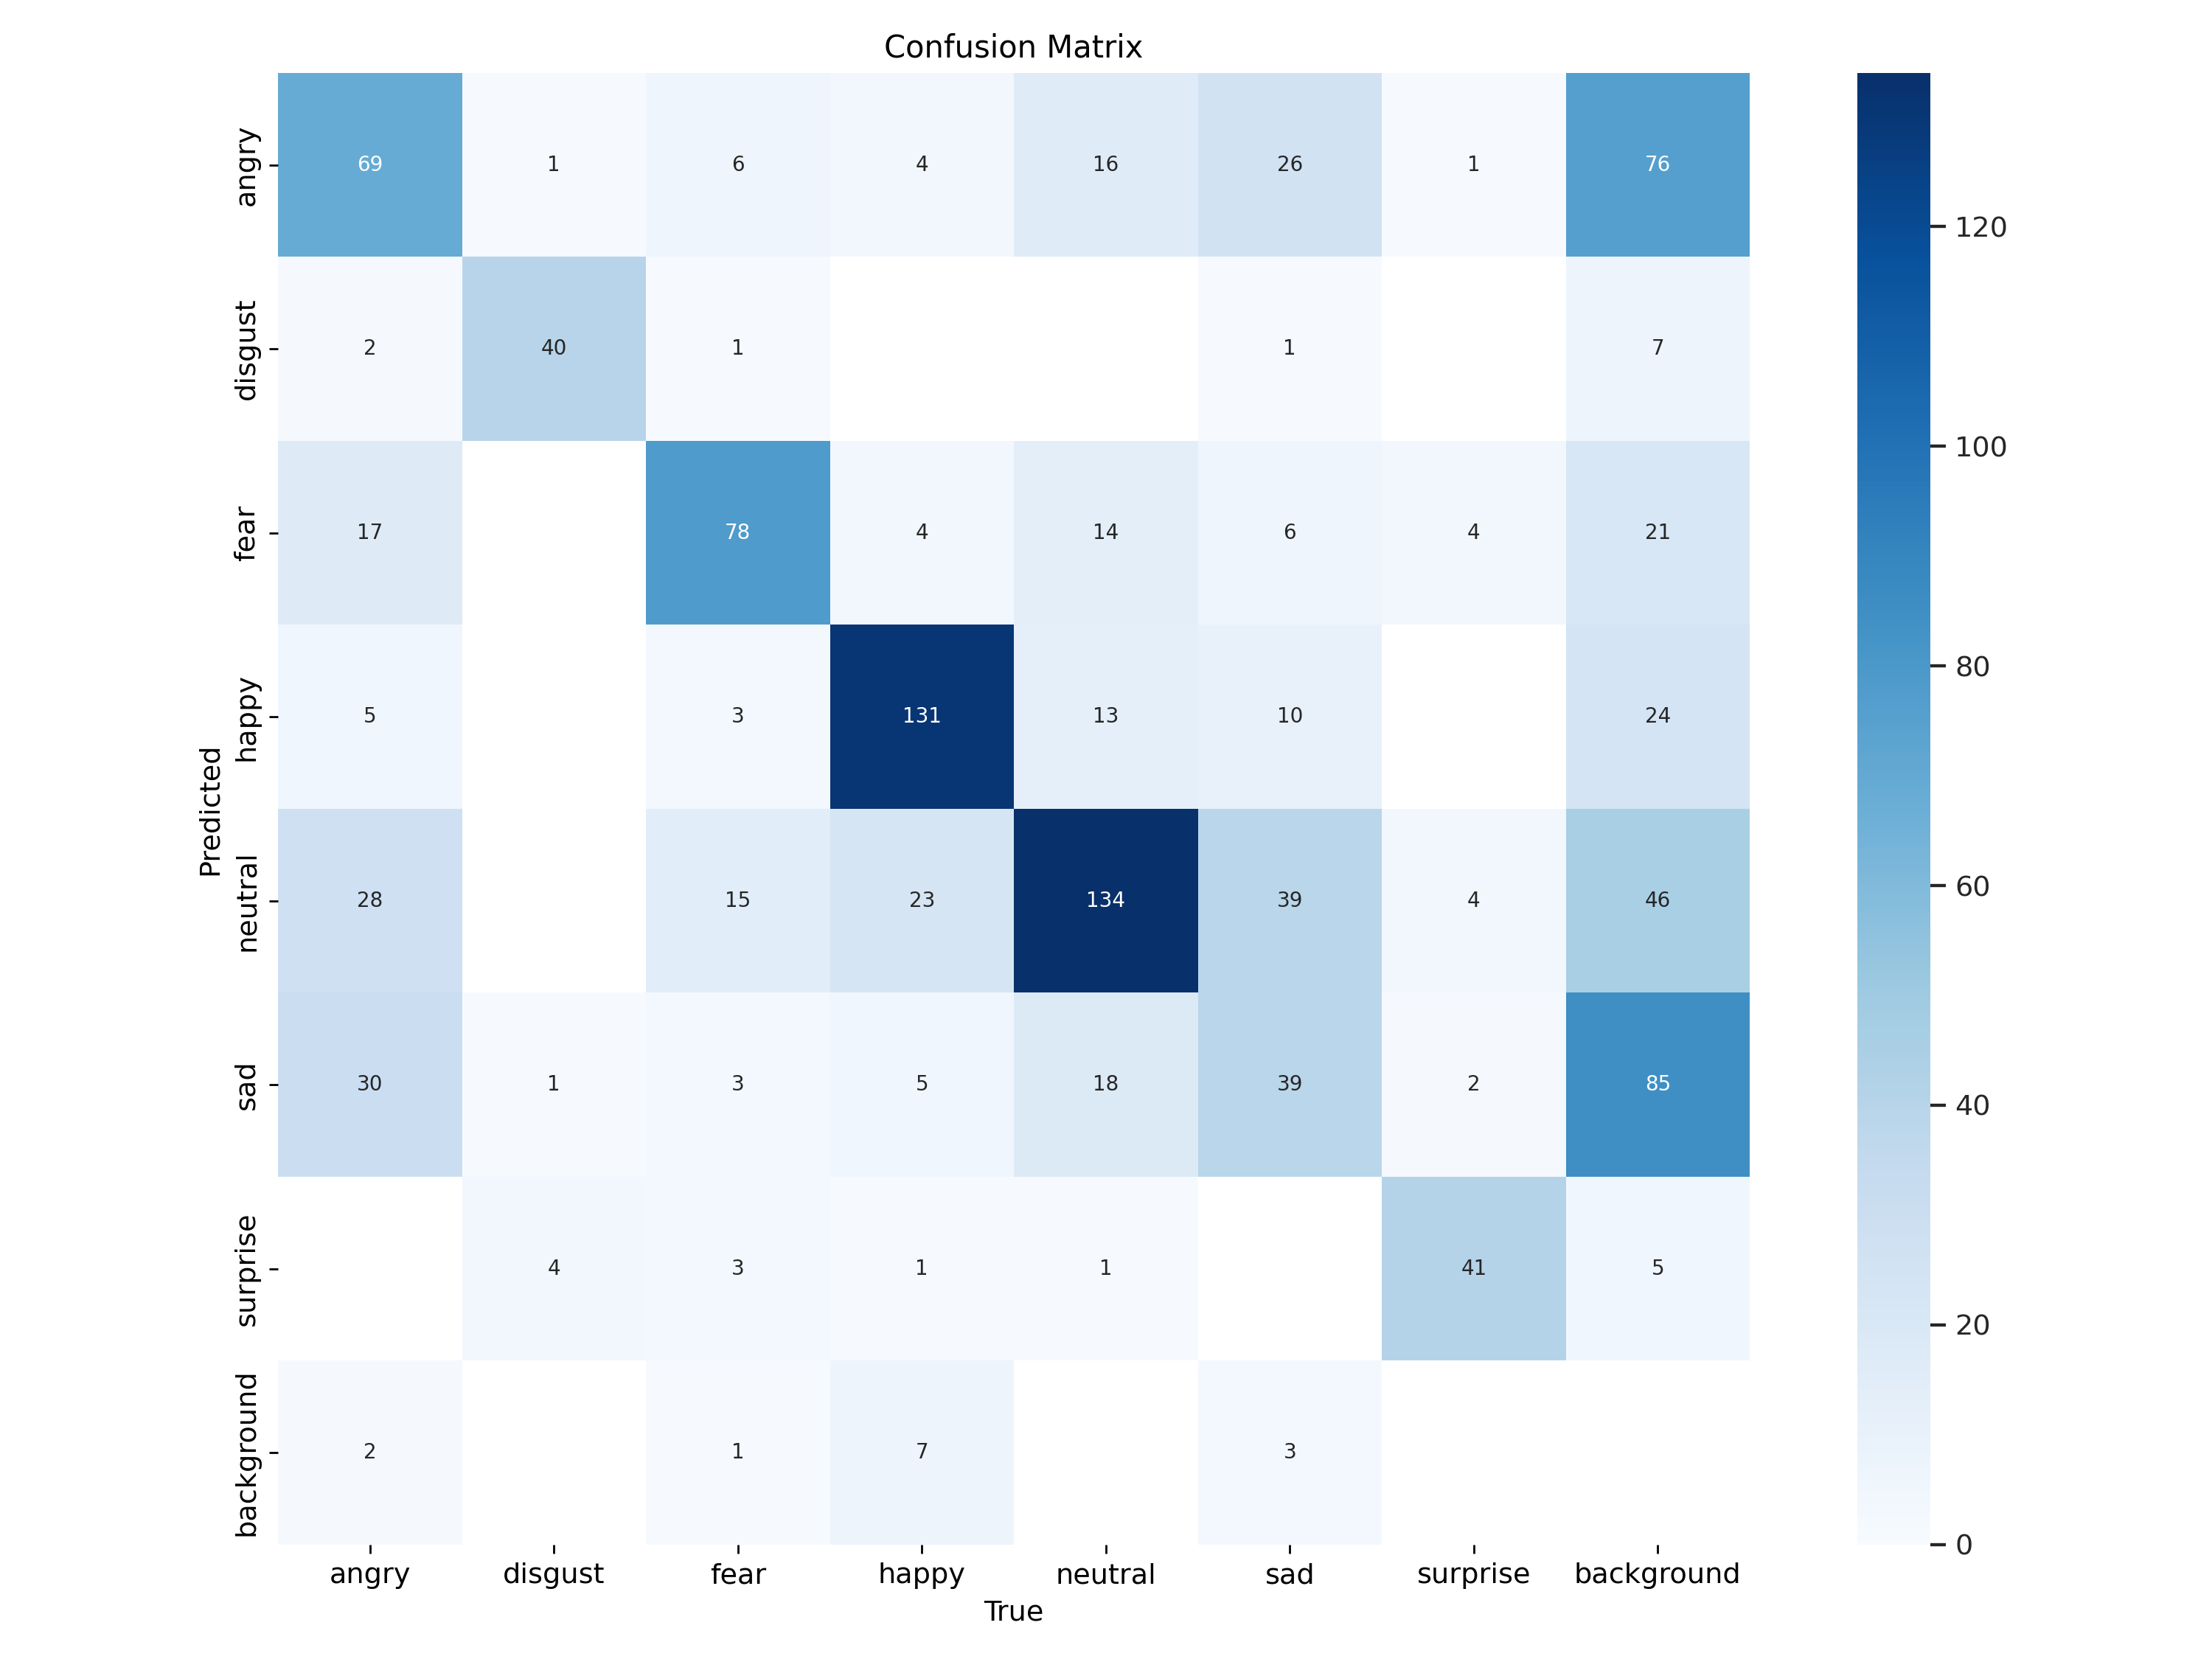

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


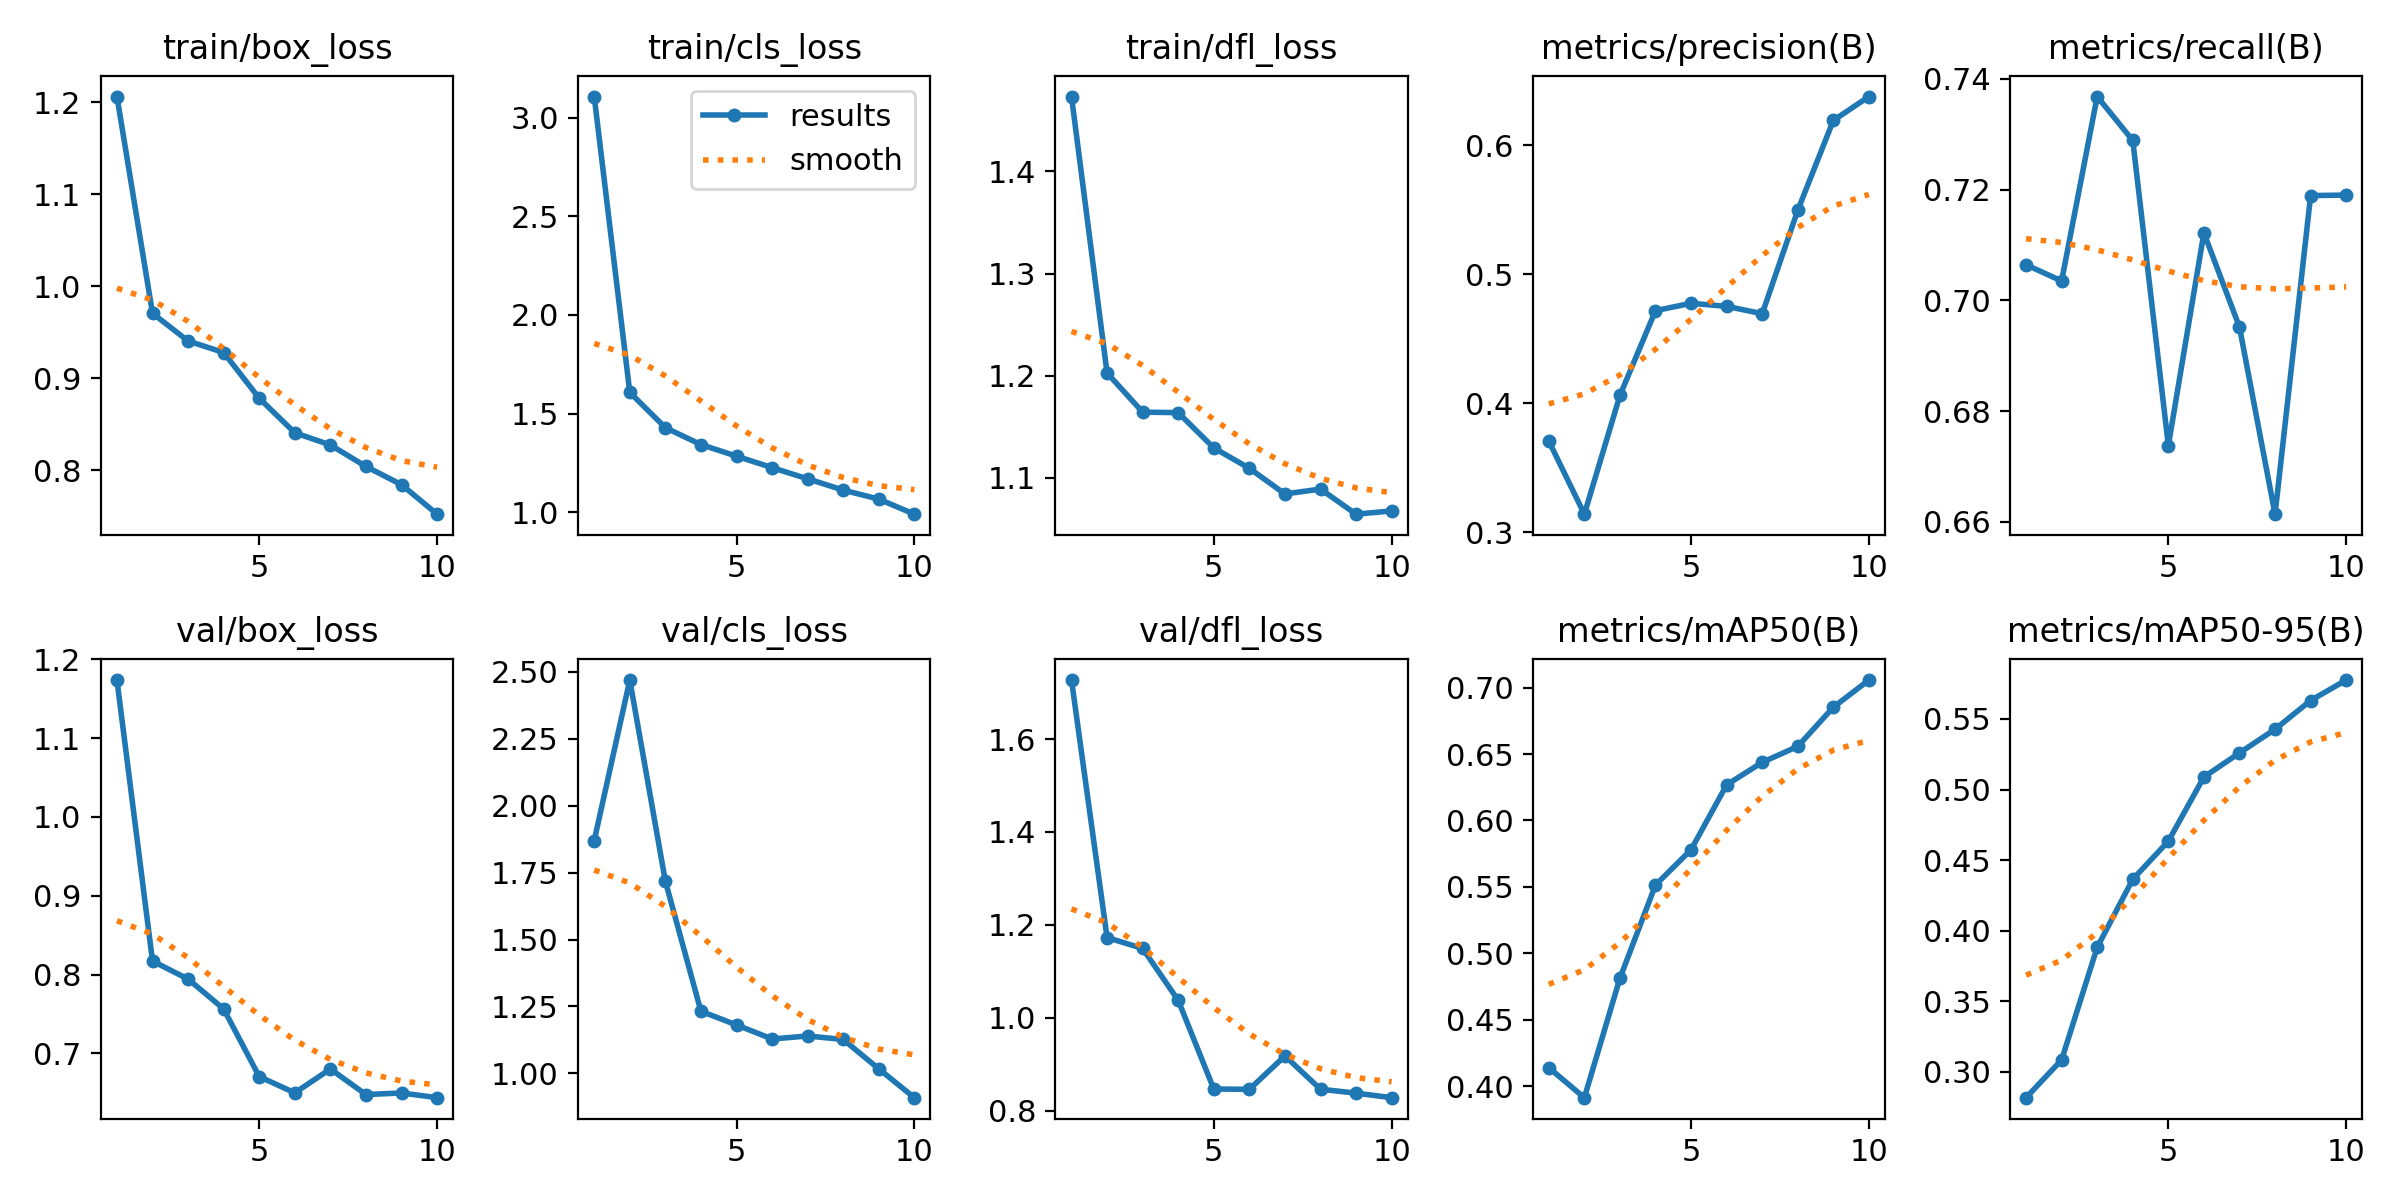

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


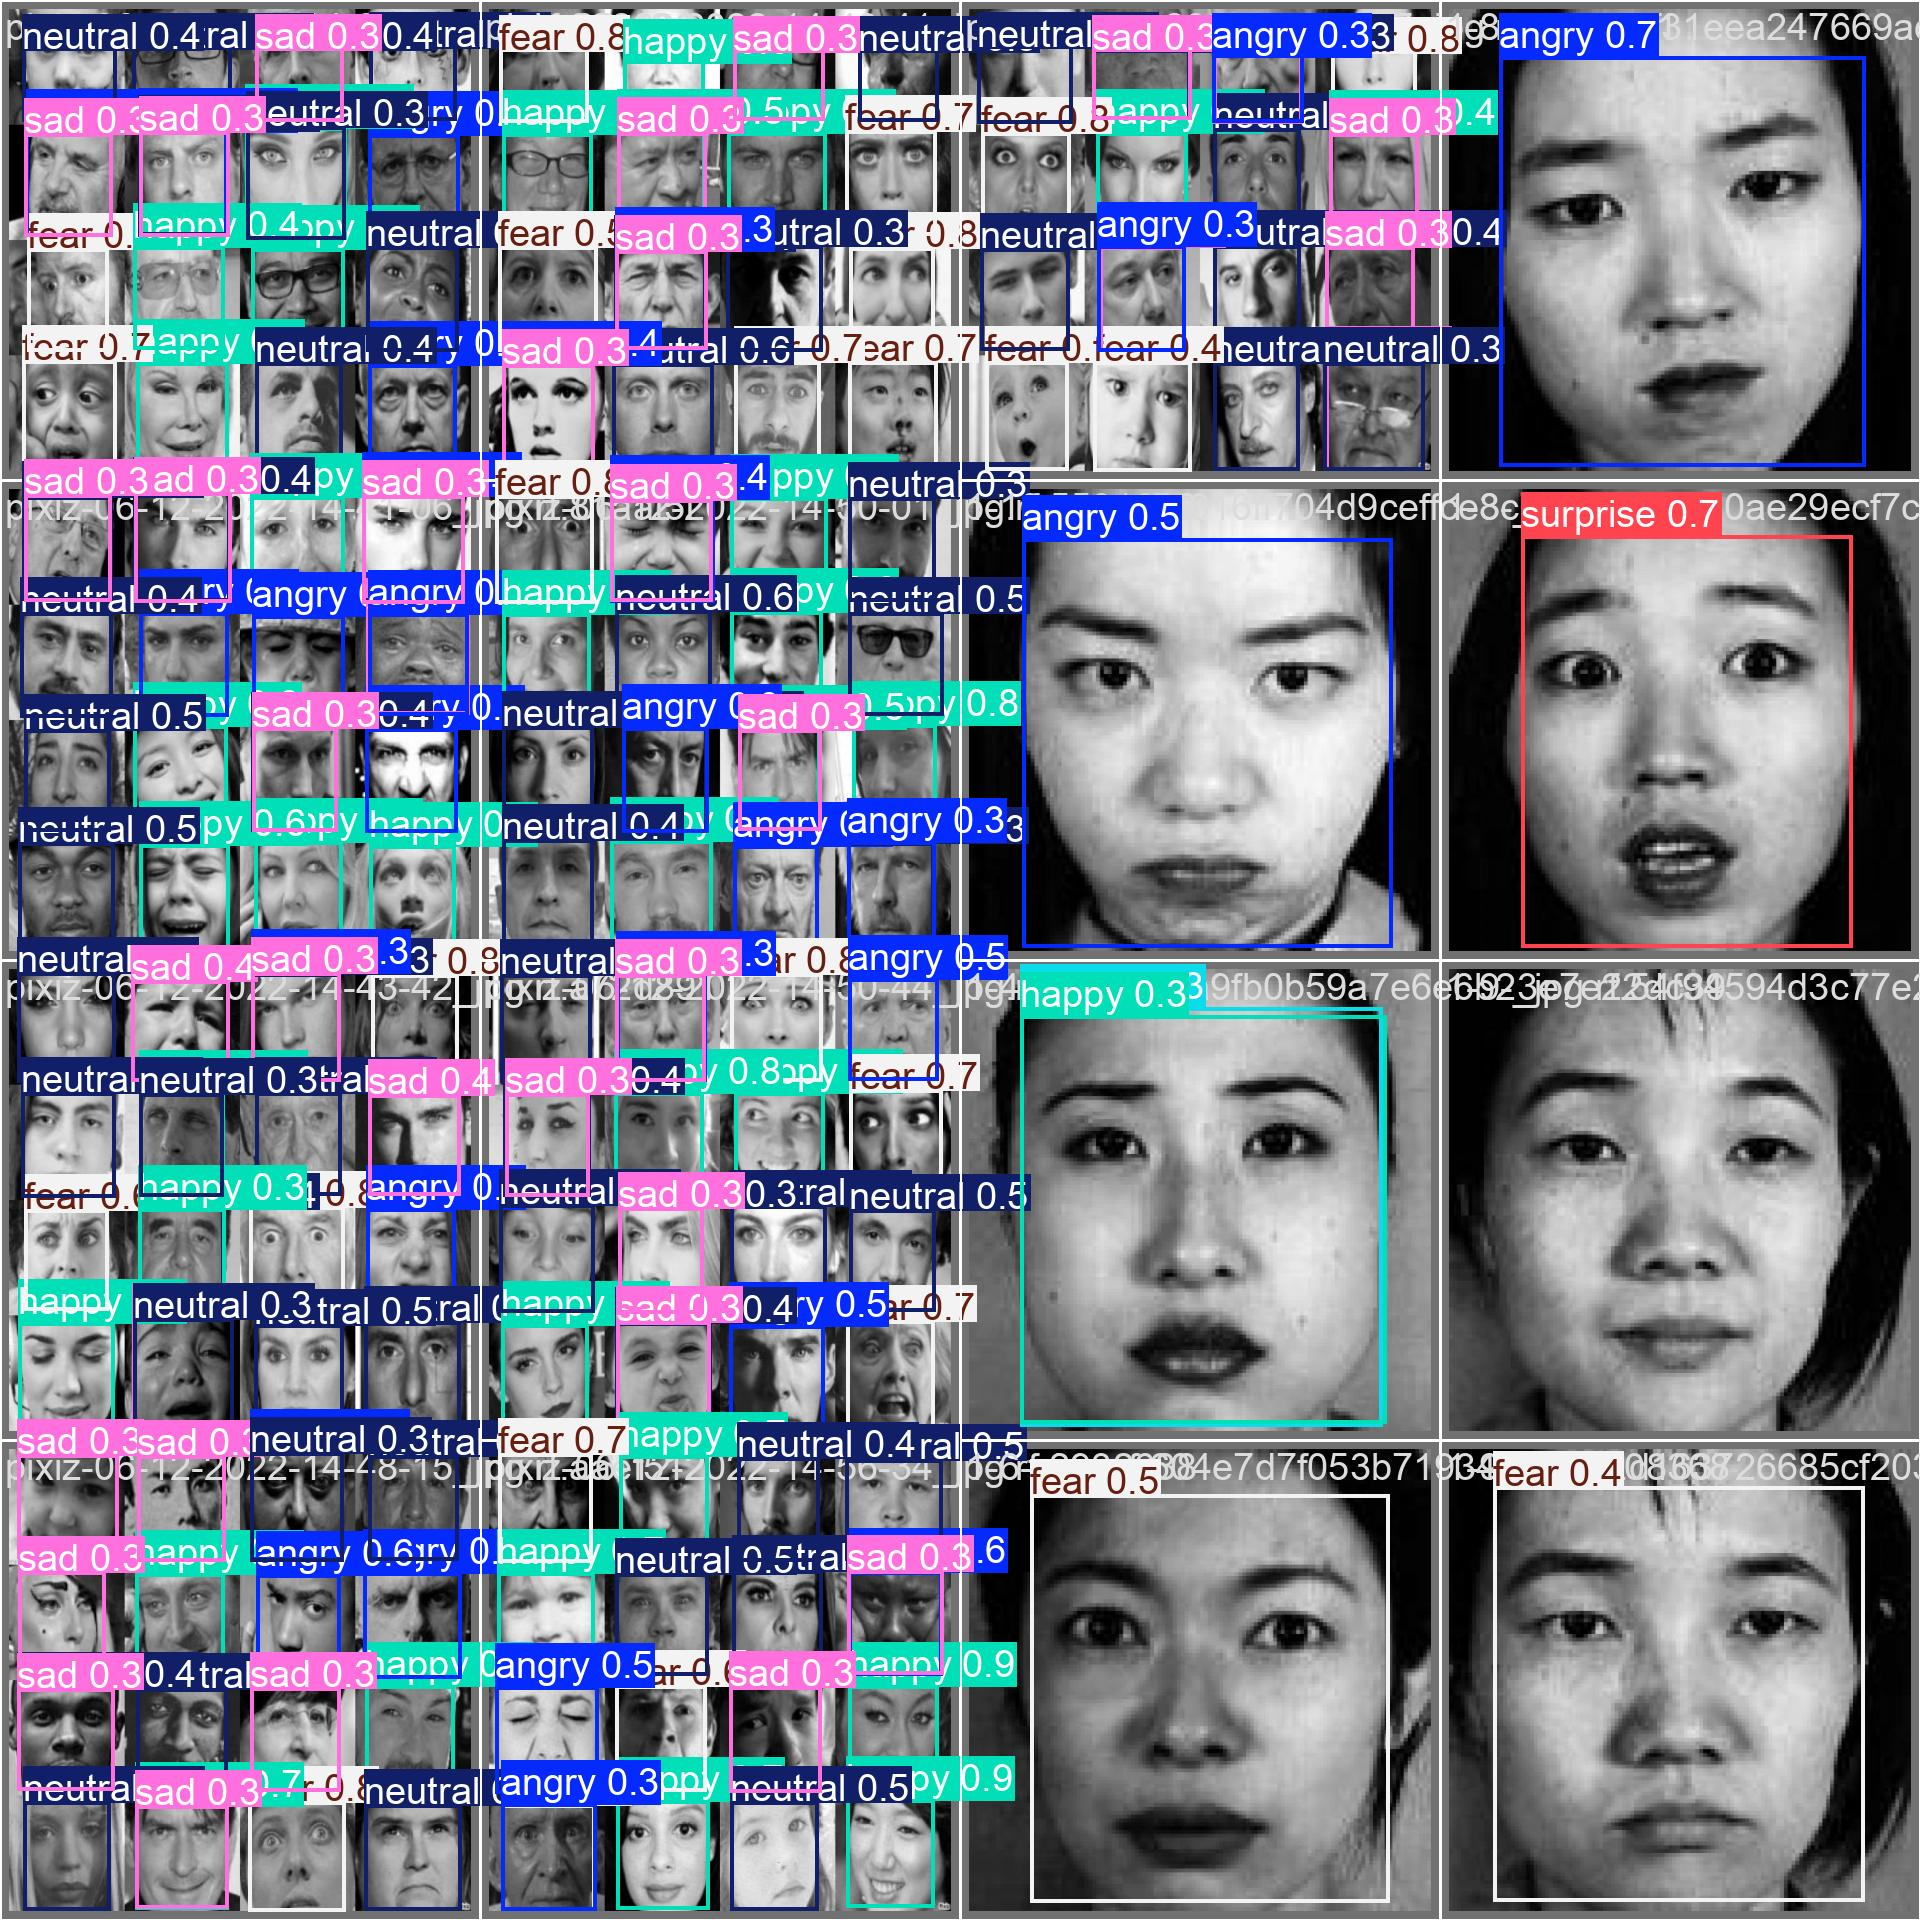

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## **Model Validation**

In [ ]:
%cd /content

!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/datasets/Moo-2/data.yaml

/content
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Moo-2/valid/labels.cache... 241 images, 0 backgrounds, 0 corrupt: 100% 241/241 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 16/16 [00:05<00:00,  2.90it/s]
                   all        241        856      0.638      0.719      0.706      0.578
                 angry         80        153      0.543      0.634       0.57      0.424
               disgust         46         46      0.851      0.913      0.952       0.93
                  fear         48        110      0.594      0.727       0.69      0.486
                 happy         58        175      0.746      0.771       0.84       0.61
               neutral         46        196      0.539       0.75      0.598      0.407
                   sad         61     

## **Model Inference**

In [ ]:
%cd /content
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source=/content/datasets/Moo-2/test/images save=True

/content
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs

image 1/120 /content/datasets/Moo-2/test/images/1-10-_jpg.rf.e46476aa15bc6f333f7653659c3e99bc.jpg: 800x800 (no detections), 23.1ms
image 2/120 /content/datasets/Moo-2/test/images/1-2-_jpg.rf.2de09a6ea155546af49602dd2a78295a.jpg: 800x800 (no detections), 22.9ms
image 3/120 /content/datasets/Moo-2/test/images/1-2-_jpg.rf.6463c36c3f9c73a39cb991ba863589c3.jpg: 800x800 (no detections), 22.8ms
image 4/120 /content/datasets/Moo-2/test/images/1-2-_jpg.rf.b392997b7e4d86ba906abb420e198953.jpg: 800x800 (no detections), 22.8ms
image 5/120 /content/datasets/Moo-2/test/images/1-3-_jpg.rf.9f4d6a34fe2d85e4566c527e4364e46c.jpg: 800x800 (no detections), 22.8ms
image 6/120 /content/datasets/Moo-2/test/images/1-6-_jpg.rf.92d766e7ec12ae7a1287ec8980c23172.jpg: 800x800 1 angry, 22.8ms
image 7/120 /content/datasets/Moo-2/test/images/1-7-

# **Visualize Inference Results**

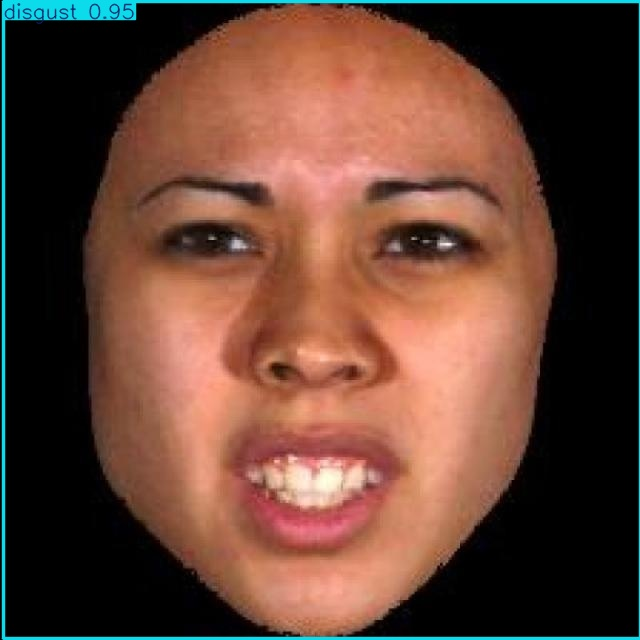

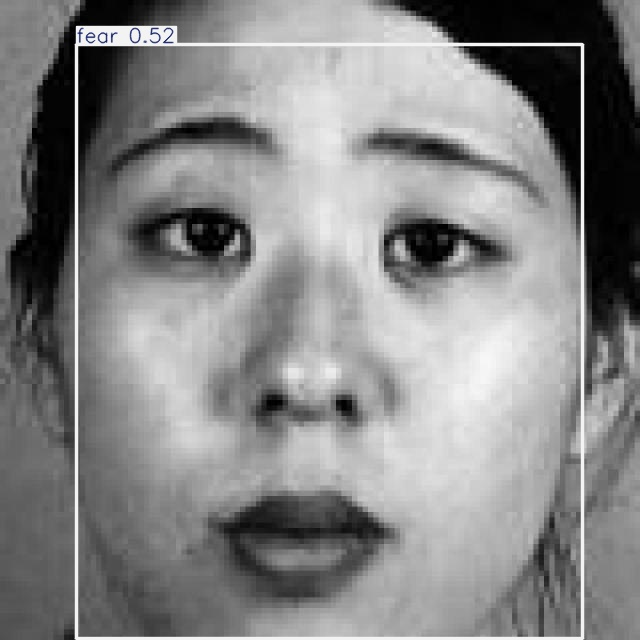

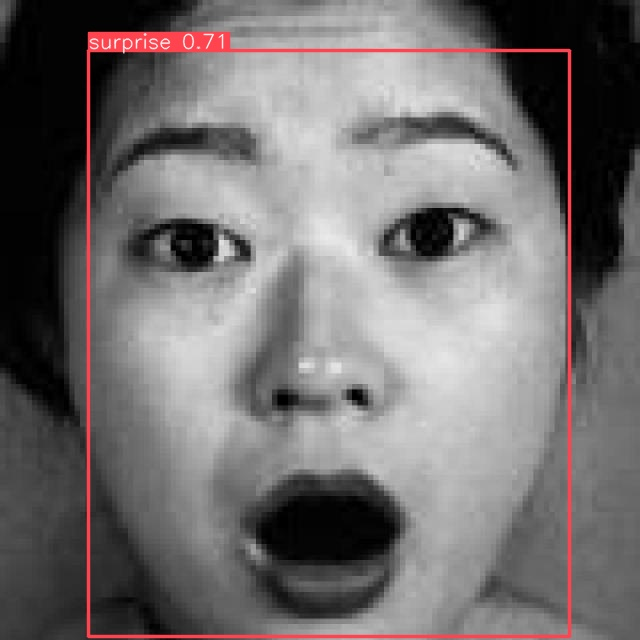

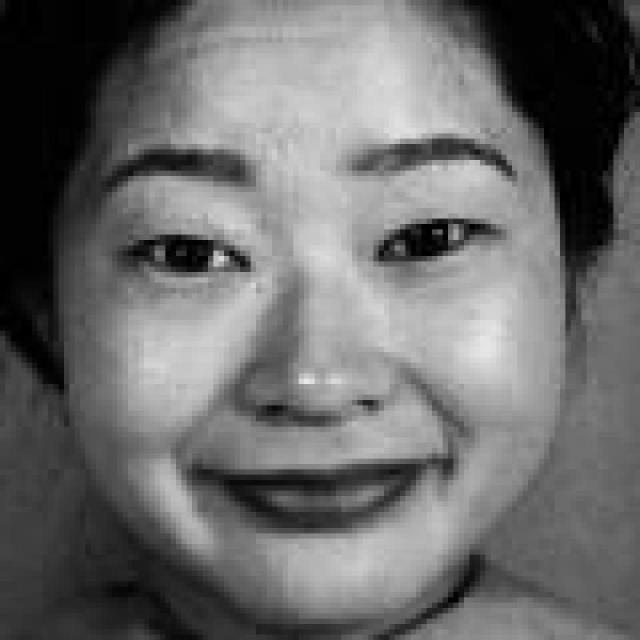

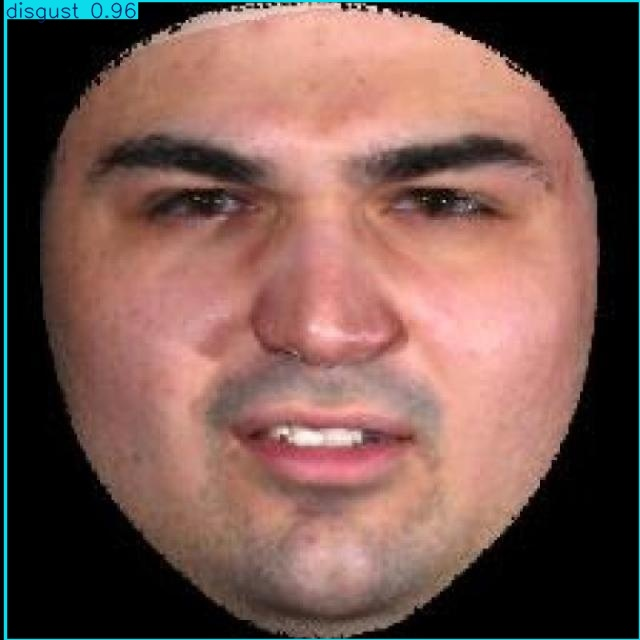

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:5]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

## **Deploy Model on Roboflow**

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


View the status of your deployment at: https://app.roboflow.com/workspace-2-vshfa/moo-lffsa/2
Share your model with the world at: https://universe.roboflow.com/workspace-2-vshfa/moo-lffsa/model/2


In [ ]:
# Run inference on your model on a persistent, auto-scaling, cloud API

# Load model
model = project.version(dataset.version).model
assert model, "Model deployment is still loading"

# Choose a random test image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on 1-8-_jpg.rf.33c467aef11afea0b73448247b085cbe.jpg


{'predictions': [{'x': 346.5,
   'y': 358.5,
   'width': 497.0,
   'height': 561.0,
   'confidence': 0.416871577501297,
   'class': 'angry',
   'class_id': 0,
   'detection_id': '98eaa445-fe8f-4e92-b3f6-b0258a73aa39',
   'image_path': '/content/datasets/Moo-2/test/images/1-8-_jpg.rf.33c467aef11afea0b73448247b085cbe.jpg',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '640', 'height': '640'}}